In [2]:
# 需要安装 paddlepaddle, paddlehub

## 1. 原始数据

In [6]:
import os

In [7]:
img_list = []
data_dir = './data'
for img in os.listdir(data_dir):
    img_list.append(os.path.join(data_dir, img))

In [8]:
img_list

['./data/tumblr_ndyfnr7lk21tubinno1_1280.jpg',
 './data/wbb.jpeg',
 './data/tumblr_ndyfq386o41tubinno1_1280.jpg']

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
wbb_file = img_list[1]

In [11]:
wbb_img = cv2.imread(wbb_file)

In [12]:
type(wbb_img)

numpy.ndarray

In [13]:
wbb_img.shape

(660, 960, 3)

(-0.5, 959.5, 659.5, -0.5)

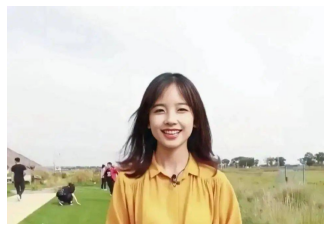

In [16]:
plt.imshow(wbb_img[:, :, ::-1])
plt.axis('off')

## 2. 模型处理

In [17]:
import paddlehub as hub

/Users/chunhuizhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/chunhuizhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/chunhuizhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/chunhuizhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
humanseg = hub.Module(name='deeplabv3p_xception65_humanseg')

[2022-05-21 14:11:07,359] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


In [22]:
results = humanseg.segmentation(data={'image':[wbb_file]}, visualization=True)

## 3. 返回结果理解

In [24]:
mask_img = results[0]['data']

In [25]:
type(mask_img)

numpy.ndarray

In [27]:
mask_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
# image
# 0: 黑色， 1/255表示白色；

(-0.5, 959.5, 659.5, -0.5)

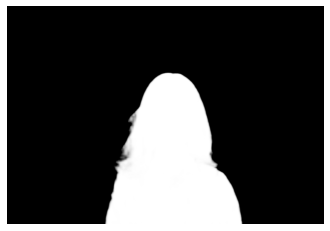

In [31]:
plt.imshow(mask_img, cmap='gray')
plt.axis('off')

In [34]:
wbb_seg = wbb_img.copy()

In [35]:
wbb_seg[:, :, 0][mask_img == 0] = 255
wbb_seg[:, :, 1][mask_img == 0] = 255
wbb_seg[:, :, 2][mask_img == 0] = 255

(-0.5, 959.5, 659.5, -0.5)

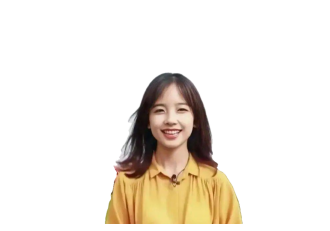

In [36]:
plt.imshow(wbb_seg[:, :, ::-1])
plt.axis('off')